IMPORT MODULES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

LOADING THE DATASET

In [ ]:
train = pd.read_csv('/content/Titanic-Dataset (1).csv')
test = pd.read_csv('/content/Titanic-Dataset (1).csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
## statistical info
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
## datatype info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


EXPLORATORY DATA ANALYSIS

<Axes: ylabel='count'>

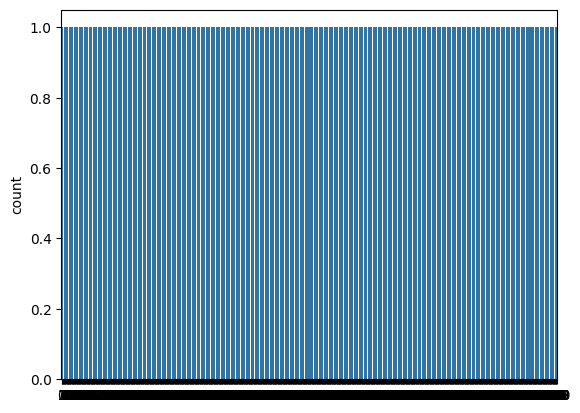

In [ ]:
## categorical attributes
sns.countplot(train['Survived'])

<Axes: ylabel='count'>

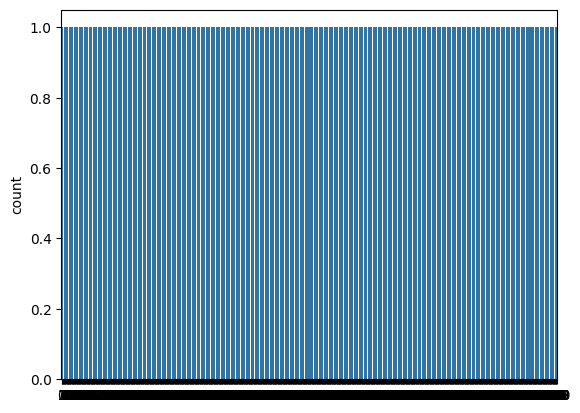

In [ ]:
sns.countplot(train['Pclass'])

<Axes: xlabel='count', ylabel='Sex'>

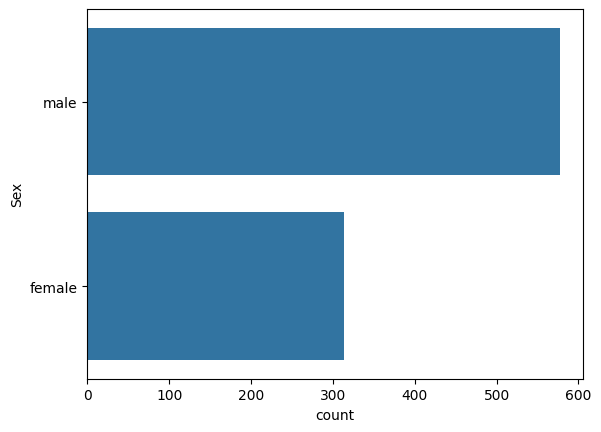

In [ ]:
sns.countplot(train['Sex'])

<Axes: ylabel='count'>

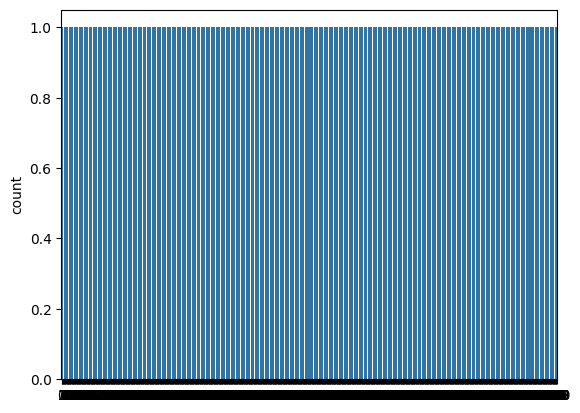

In [ ]:
sns.countplot(train['SibSp'])

<Axes: ylabel='count'>

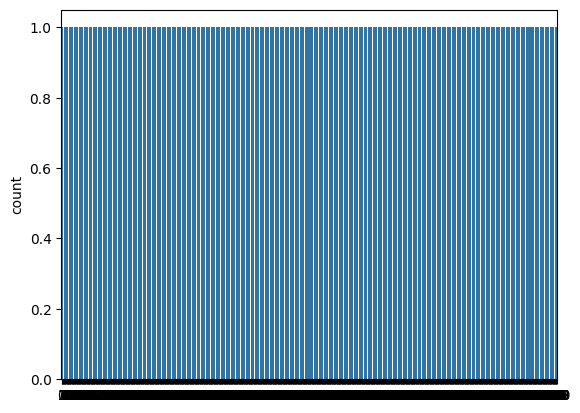

In [ ]:
sns.countplot(train['Parch'])

<Axes: xlabel='count', ylabel='Embarked'>

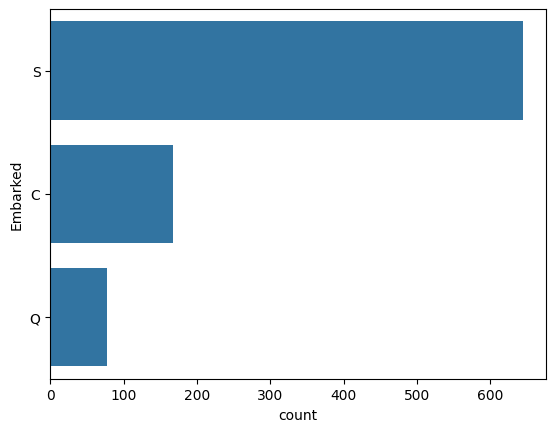

In [ ]:
sns.countplot(train['Embarked'])

<Axes: xlabel='Age', ylabel='Density'>

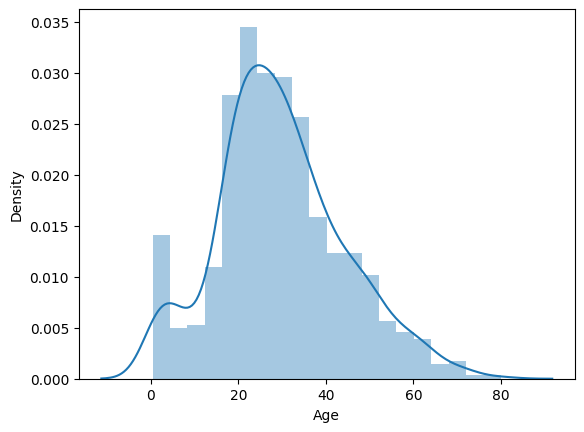

In [ ]:
##numerical attributes
sns.distplot(train['Age'])

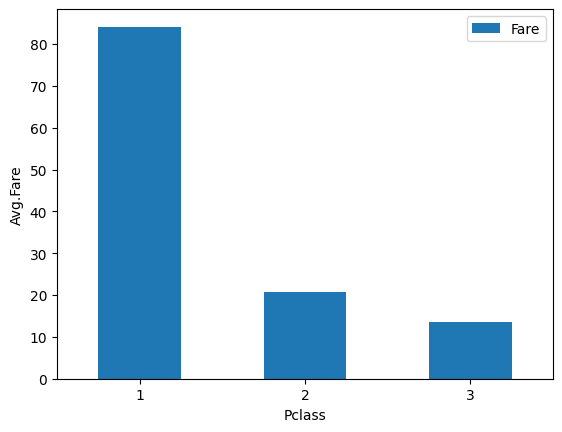

In [ ]:
class_fare=train.pivot_table(index='Pclass',values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg.Fare')
plt.xticks(rotation=0)
plt.show()

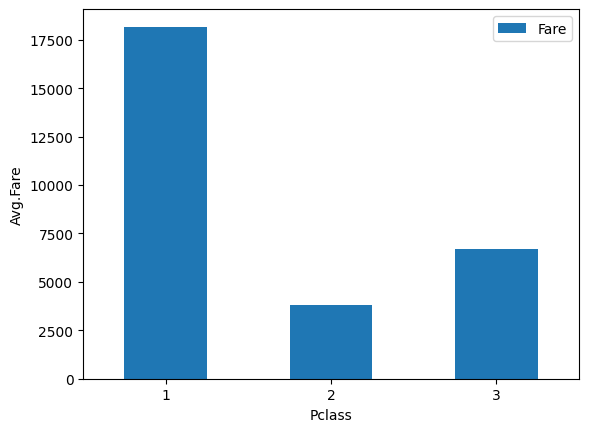

In [ ]:
class_fare=train.pivot_table(index='Pclass',values='Fare',aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg.Fare')
plt.xticks(rotation=0)
plt.show()

<Axes: xlabel='Pclass', ylabel='Fare'>

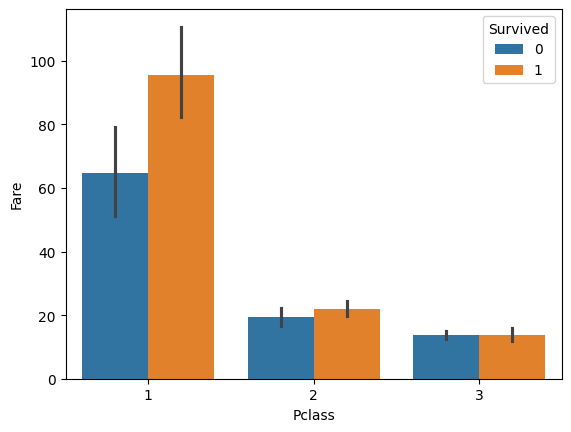

In [ ]:
sns.barplot(data=train,x='Pclass', y='Fare',hue='Survived')

<Axes: xlabel='Survived', ylabel='Fare'>

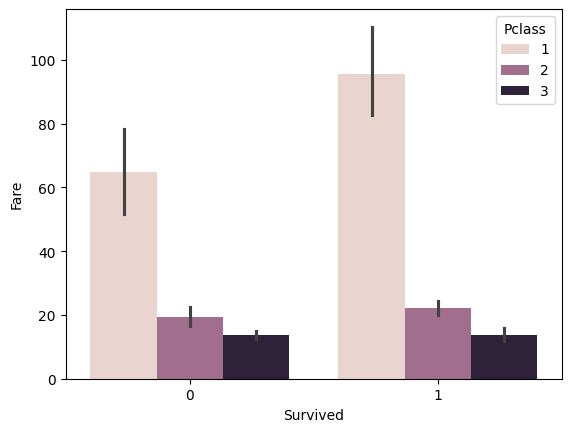

In [ ]:
sns.barplot(data=train,x='Survived', y='Fare',hue='Pclass')

Data Preprocessing

In [ ]:
train_len = len(train)
##combine two dataframes
df = pd.concat([train, test], axis=0)
df = df.reset_index(drop=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_len

891

In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
## find the null values
df.isnull().sum()

,0
index,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,354
SibSp,0
Parch,0
Ticket,0


In [ ]:
#drop or delete the column
df = df.drop(columns=['Cabin'],axis=1)

In [ ]:
df['Age'].mean()

29.69911764705882

In [ ]:
#fill missing values using mean of the numerical column
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [ ]:
df['Embarked'].mode()[0]

'S'

In [ ]:
#fill missing values using mode of the categorical column
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0]

## Log transformation for uniform data distribution

<Axes: xlabel='Fare', ylabel='Density'>

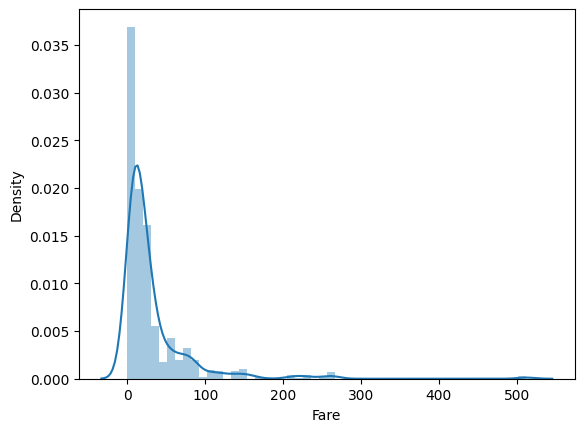

In [ ]:
sns.distplot(df['Fare'])

In [ ]:
df['Fare'] = np.log(df['Fare']+1)

<Axes: xlabel='Fare', ylabel='Density'>

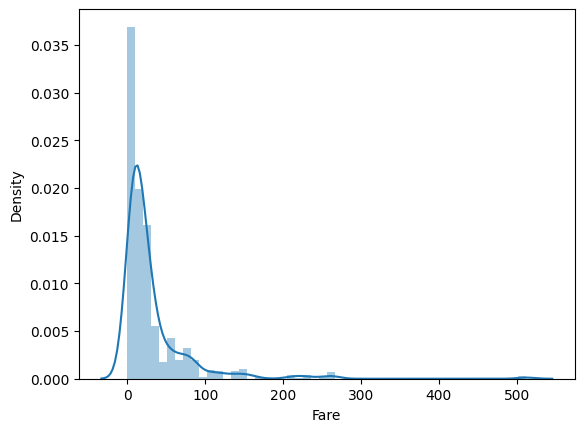

In [ ]:
sns.distplot(df['Fare'])

## Correlation Matrix

<Axes: >

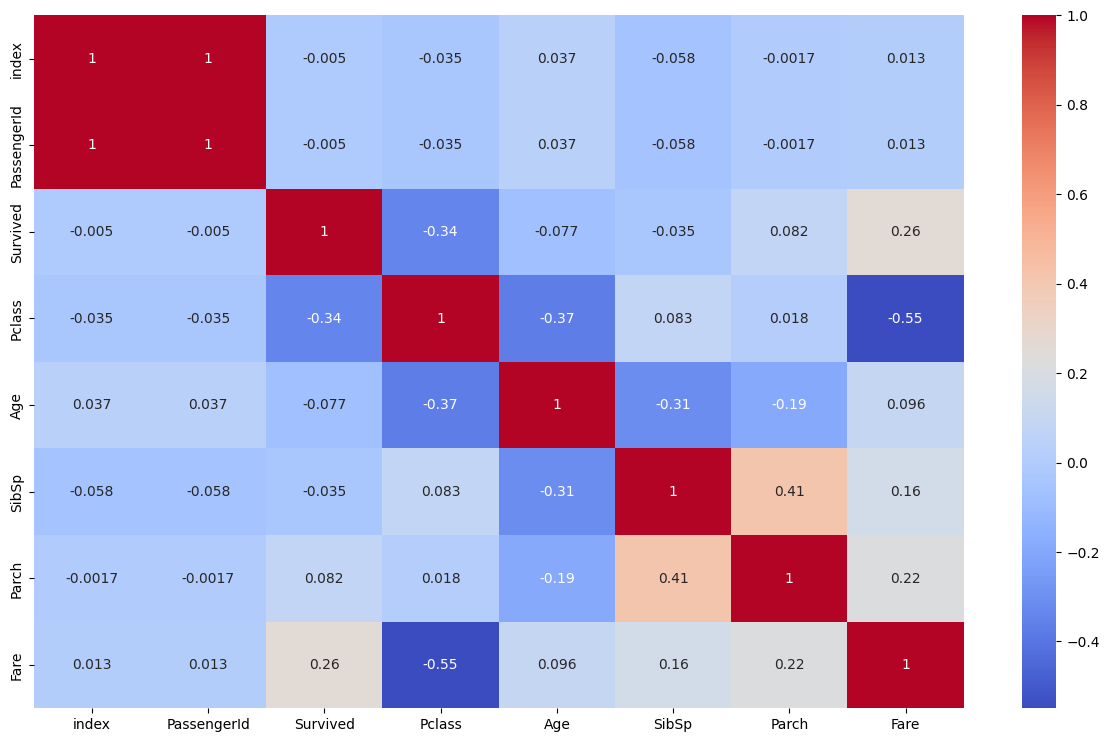

In [ ]:
df_numeric = df.select_dtypes(include=['number'])
corr = df_numeric.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,NaN,S


In [ ]:
## drop unecessary columns
df = df.drop(columns=['Name','Ticket'],axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,2.110213,NaN,S
1,2,1,1,female,38.0,1,0,4.280593,C85,C
2,3,1,3,female,26.0,0,0,2.188856,NaN,S
3,4,1,1,female,35.0,1,0,3.990834,C123,S
4,5,0,3,male,35.0,0,0,2.202765,NaN,S


## Label  Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
cools = ['Sex','Embarked']
le = LabelEncoder()

for col in cools:
  df[col] = le.fit_transform(df[col])
  df.head()

## Train-Test Split

In [ ]:
train = df.iloc[:train_len]
test = df.iloc[train_len:]

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# input split
x = train.drop(columns=['PassengerId', 'Survived'], axis=1)
y = train['Survived']


In [ ]:
#Handle categorical columns
x = pd.get_dummies(x, columns=['Sex', 'Embarked', 'Cabin', 'Ticket', 'Name'], drop_first=True) # Assuming these are your categorical columns

In [ ]:
x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Model Training

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
# classify column
def classify(model, x, y):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
  model.fit(x_train, y_train)
  print('Accuracy: ', model.score(x_test, y_test))
  score = cross_val_score(model, x, y, cv=5)
  print('Cross Validation Score:', np.mean(score))

In [ ]:
# Impute missing values using SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent') # Replace NaNs with the most frequent value in each column
x = imputer.fit_transform(x)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, x, y) #Call the classify function after it's been defined

Accuracy:  0.820627802690583
Cross Validation Score: 0.8069487163392128


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, x, y)

Accuracy:  0.820627802690583
Cross Validation Score: 0.8260749482141737


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, x, y)

Accuracy:  0.8430493273542601
Cross Validation Score: 0.824913690289373


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model, x, y)

Accuracy:  0.8385650224215246
Cross Validation Score: 0.8260121775155358


In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
classify(model, x, y)

Accuracy:  0.7802690582959642
Cross Validation Score: 0.8260749482141737


In [ ]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
classify(model, x, y)

[LightGBM] [Info] Number of positive: 253, number of negative: 415
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 668, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.378743 -> initscore=-0.494889
[LightGBM] [Info] Start training from score -0.494889
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Complete Model Training with Full Data

In [ ]:
model = LGBMClassifier()
model.fit(x, y)

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 222
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288


LGBMClassifier()

In [ ]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
 # input split for test data
x_test = test.drop(columns=['PassengerId', 'Survived'], axis=1)

In [ ]:
x_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Define the preprocessing steps here.
# For example, if you standardized 'x' during training:
from sklearn.preprocessing import StandardScaler

# Identify columns with string values (example)
string_columns = x.select_dtypes(include=['object']).columns  # Check training data 'x'

# Handle string columns (example using one-hot encoding)
x_encoded = pd.get_dummies(x, columns=string_columns)  # Encode training data 'x'
x_test_encoded = pd.get_dummies(x_test, columns=string_columns)  # Encode test data

# Align columns between training and test data after one-hot encoding
# Use the columns from the training data as a reference to ensure consistency
x_test_encoded = x_test_encoded.reindex(columns=x_encoded.columns, fill_value=0)

scaler = StandardScaler()
scaler.fit(x_encoded)  # Fit the scaler on the ENCODED training data

x_test_transformed = scaler.transform(x_test_encoded)  # Transform the encoded test data

# Check if the number of features match before prediction
if x_test_transformed.shape[1] != model._n_features:
    # Instead of raising an error, try to identify the mismatched columns
    train_columns = set(x_encoded.columns)
    test_columns = set(x_test_encoded.columns)

    print("Extra columns in test data:", test_columns - train_columns)
    print("Missing columns in test data:", train_columns - test_columns)

    # Optionally, you can try to adjust the test data to match the training data,
    # but be cautious about potential data leakage.
    # For example, to remove extra columns:
    # x_test_transformed = x_test_transformed[:, [x_encoded.columns.get_loc(c) for c in train_columns]]

    # Or to add missing columns (filled with zeros):
    # for col in train_columns - test_columns:
    #     x_test_encoded[col] = 0
    # x_test_transformed = scaler.transform(x_test_encoded.reindex(columns=x_encoded.columns, fill_value=0))

# Proceed with prediction only if you've resolved the feature mismatch
# pred = model.predict(x_test_transformed)
# pred

Extra columns in test data: set()
Missing columns in test data: set()


TEST SUBMISSION

In [ ]:
sub = pd.read_csv('/content/Titanic-Dataset (1).csv')
sub.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
sub['Survived'] = pred

In [ ]:
sub.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
